# Examining data and plotting using xarrays

## Setting up the data

See the "Reading metadata using xarray" for how to input data using xarray.

In [1]:
%pylab inline
import xarray

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = xarray.open_dataset('example_data/WOA13_annual_SST_nc4_classic.nc')

## Examining the metadata 

In [3]:
data

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
Data variables:
    tos      (lat, lon) float64 ...
Attributes:
    Conventions:                   CF-1.6
    summary:                       Climatological mean temperature for the gl...
    references:                    Locarnini, R. A., A. V. Mishonov, J. I. An...
    institution:                   National Oceanographic Data Center(NODC)
    comment:                       global climatology as part of the World Oc...
    id:                            woa13_decav_t00_01.ncv2.0
    naming_authority:              gov.noaa.nodc
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    sea_name:                      World-Wide Distribution
    time_coverage_start:           0000-01-01
    time_coverage_duration:        P01Y
    time_coverag

Upon inspecting our metadata, we can see our "data variable" is 'tos', which is mapped onto specific coordinates 'lat' and 'lon'. Alternatively, we can call `.variables` to view the variables contained in our data set and their attributes.

In [4]:
data.variables

Frozen(OrderedDict([('lat', <xarray.IndexVariable 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        

We can access the 'tos' variable (which corresponds to sea surface temperature according to the above metadata) by calling it from our data. Specifically, we will store it in another variable of the identical name.

In [5]:
tos = data['tos']

## Plotting the data

We can view the contents of `tos` by simply calling it.

In [9]:
tos

<xarray.DataArray 'tos' (lat: 180, lon: 360)>
array([[     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       ...,
       [-1.54911, -1.55321, -1.55531, ..., -1.54461, -1.54581, -1.54691],
       [-1.55831, -1.56001, -1.56111, ..., -1.55651, -1.5568 , -1.55741],
       [-1.57421, -1.57421, -1.57421, ..., -1.57421, -1.57421, -1.57421]])
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
Attributes:
    coordinates:    time lat lon depth
    cell_methods:   area: mean depth: mean time: mean
    grid_mapping:   crs
    units:          degrees_celsius
    standard_name:  sea_surface_temperature
    long_name:      Objectively analyzed mean fields for sea_surface_temperat...

Again, we see that each `tos` value corresponds to a `lat`, `lon` coordinate pair. We can plot `tos` using the following plot command. Additionally, we add a color bar to our plot.

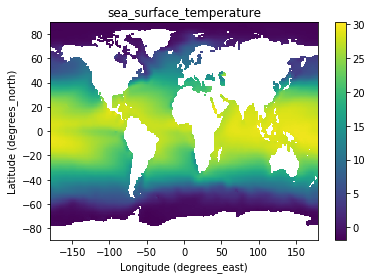

In [16]:
plt.pcolormesh(tos['lon'][:], tos['lat'][:], tos)
plt.colorbar()
plt.title(tos.standard_name);
plt.xlabel('Longitude (%s)' %tos['lon'].units);
plt.ylabel('Latitude (%s)' %tos['lat'].units);